# Project: Investigate a Dataset (Soccer Database)

## Questions
### Players

2008/2009 season

Q1. How many Players participated in the EPL?

Q2. What is the assessment of players overall_rating?

Q3. What is the relation of certain Player attributes to overall player rating?

### Teams

2009/2010 season

Q1.What were the home team results i.e. 'W', 'L' or 'D' for all matches?

Q2. Which Team had the most draws i.e. 'D'?

Q3. Which Team won the league?

## Introduction

An assessment of Soccer Data split into two categories being Team data and player data. In player data the player attributes are analysed by graphs and drawing conclusions.As for the team data, we identify which team had the most draws in a particular season and which team won the league. The questions asked and answered are stated above.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data Wrangling

The data is loaded and cleaned to display columns of interest and identify duplicates

In [2]:
#load player data and team data
df_p = pd.read_csv('Player_data.csv')
df_t = pd.read_csv('Team_data.csv')

In [3]:
#Look at player dataframe columns
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50457 entries, 0 to 50456
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   50457 non-null  int64  
 1   season               50457 non-null  object 
 2   league_id            50457 non-null  int64  
 3   player_api_id        50457 non-null  int64  
 4   player_name          50457 non-null  object 
 5   birthday             50457 non-null  object 
 6   height               50457 non-null  float64
 7   weight               50457 non-null  int64  
 8   id.1                 50457 non-null  int64  
 9   player_fifa_api_id   50457 non-null  int64  
 10  player_api_id.1      50457 non-null  int64  
 11  date                 50457 non-null  object 
 12  overall_rating       50258 non-null  float64
 13  potential            50258 non-null  float64
 14  preferred_foot       50258 non-null  object 
 15  attacking_work_rate  49541 non-null 

In [4]:
# create new df with selected columns needed to answer questions
df_players = df_p.iloc[:, [1, 4, 5, 6, 7, 11, 12, 17, 18, 19, 20, 22, 26, 28, 34]]
df_players

,season,player_name,birthday,height,weight,date,overall_rating,crossing,finishing,heading_accuracy,short_passing,dribbling,ball_control,sprint_speed,stamina
0,2008/2009,Chris Smith,1986-03-05 00:00:00,187.96,190,2013-02-15 00:00:00,59.0,12.0,9.0,11.0,11.0,16.0,19.0,22.0,52.0
1,2008/2009,Chris Smith,1986-03-05 00:00:00,187.96,190,2012-08-31 00:00:00,61.0,12.0,9.0,11.0,11.0,19.0,24.0,22.0,52.0
2,2008/2009,Chris Smith,1986-03-05 00:00:00,187.96,190,2011-08-30 00:00:00,61.0,12.0,9.0,11.0,11.0,19.0,24.0,22.0,52.0
3,2008/2009,Chris Smith,1986-03-05 00:00:00,187.96,190,2009-08-30 00:00:00,61.0,12.0,9.0,11.0,11.0,19.0,24.0,22.0,52.0
4,2008/2009,Chris Smith,1986-03-05 00:00:00,187.96,190,2008-08-30 00:00:00,63.0,12.0,9.0,11.0,11.0,19.0,24.0,22.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50452,2015/2016,Jean-Armel Kana-Biyik,1989-07-03 00:00:00,182.88,190,2010-08-30 00:00:00,60.0,16.0,19.0,49.0,40.0,26.0,30.0,41.0,46.0
50453,2015/2016,Jean-Armel Kana-Biyik,1989-07-03 00:00:00,182.88,190,2010-02-22 00:00:00,60.0,21.0,21.0,49.0,40.0,26.0,30.0,41.0,46.0
50454,2015/2016,Jean-Armel Kana-Biyik,1989-07-03 00:00:00,182.88,190,2009-08-30 00:00:00,58.0,21.0,21.0,49.0,40.0,26.0,30.0,41.0,46.0
50455,2015/2016,Jean-Armel Kana-Biyik,1989-07-03 00:00:00,182.88,190,2008-08-30 00:00:00,47.0,21.0,21.0,39.0,40.0,26.0,21.0,41.0,46.0


In [5]:
#Look at data from the 2008/2009 season, check missing data and datatypes
df_08_09 = df_players.query('season == "2008/2009"')
df_08_09.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6294 entries, 0 to 6293
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   season            6294 non-null   object 
 1   player_name       6294 non-null   object 
 2   birthday          6294 non-null   object 
 3   height            6294 non-null   float64
 4   weight            6294 non-null   int64  
 5   date              6294 non-null   object 
 6   overall_rating    6274 non-null   float64
 7   crossing          6274 non-null   float64
 8   finishing         6274 non-null   float64
 9   heading_accuracy  6274 non-null   float64
 10  short_passing     6274 non-null   float64
 11  dribbling         6274 non-null   float64
 12  ball_control      6274 non-null   float64
 13  sprint_speed      6274 non-null   float64
 14  stamina           6274 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 786.8+ KB


In [6]:
#Find out number of EPL players in the 2008/2009 season
df_08_09['player_name'].nunique()

375

Players Q1 answer

There were 375 players that participated in the 2008/2009 EPL season

In [7]:
#convert date column data type from object to datetime
pd.to_datetime(df_08_09['date'])

0      2013-02-15
1      2012-08-31
2      2011-08-30
3      2009-08-30
4      2008-08-30
          ...    
6289   2010-08-30
6290   2010-02-22
6291   2007-02-22
6292   2008-08-30
6293   2007-02-22
Name: date, Length: 6294, dtype: datetime64[ns]

In [8]:
#get selected player attributes in year 2009 after June

start_date = '2009-06-01'
end_date = '2009-12-31'

mask = (df_08_09['date'] >= start_date) & (df_08_09['date'] <= end_date)
df_A_09 = df_08_09.loc[mask]
df_A_09

,season,player_name,birthday,height,weight,date,overall_rating,crossing,finishing,heading_accuracy,short_passing,dribbling,ball_control,sprint_speed,stamina
3,2008/2009,Chris Smith,1986-03-05 00:00:00,187.96,190,2009-08-30 00:00:00,61.0,12.0,9.0,11.0,11.0,19.0,24.0,22.0,52.0
15,2008/2009,Chris Turner,1987-01-03 00:00:00,180.34,174,2009-08-30 00:00:00,55.0,53.0,22.0,56.0,51.0,49.0,53.0,61.0,57.0
27,2008/2009,Chris,1978-08-25 00:00:00,185.42,172,2009-08-30 00:00:00,73.0,37.0,32.0,76.0,71.0,48.0,67.0,68.0,74.0
49,2008/2009,Christiaan Kum,1985-09-13 00:00:00,182.88,154,2009-08-30 00:00:00,66.0,43.0,36.0,58.0,64.0,53.0,58.0,69.0,65.0
77,2008/2009,Christian Abbiati,1977-07-08 00:00:00,190.50,203,2009-08-30 00:00:00,82.0,21.0,21.0,21.0,35.0,21.0,24.0,56.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6107,2008/2009,Daniel Baier,1984-05-18 00:00:00,175.26,170,2009-08-30 00:00:00,69.0,73.0,64.0,61.0,77.0,69.0,74.0,76.0,71.0
6141,2008/2009,Daniel Beichler,1988-10-13 00:00:00,182.88,170,2009-08-30 00:00:00,68.0,65.0,71.0,61.0,69.0,70.0,70.0,71.0,63.0
6174,2008/2009,Daniel Brinkmann,1986-01-29 00:00:00,193.04,194,2009-08-30 00:00:00,62.0,64.0,54.0,65.0,65.0,54.0,64.0,68.0,71.0
6205,2008/2009,Daniel Brosinski,1988-07-17 00:00:00,177.80,154,2009-08-30 00:00:00,62.0,57.0,60.0,51.0,66.0,66.0,62.0,72.0,52.0


In [9]:
#check that each player was checked once during this period
df_A_09['player_name'].count()

202

In [10]:
df_A_09['player_name'].nunique()

201

In [11]:
#Check duplicates
df_A_09[df_A_09['player_name'].duplicated(keep=False)]


,season,player_name,birthday,height,weight,date,overall_rating,crossing,finishing,heading_accuracy,short_passing,dribbling,ball_control,sprint_speed,stamina
1894,2008/2009,Cicinho,1986-08-04 00:00:00,175.26,139,2009-08-30 00:00:00,69.0,70.0,52.0,43.0,72.0,70.0,73.0,77.0,77.0
1912,2008/2009,Cicinho,1980-06-24 00:00:00,172.72,150,2009-08-30 00:00:00,77.0,79.0,57.0,64.0,78.0,76.0,76.0,85.0,83.0


fyi-2 players have different birthday, attributes yet share same name

### Exploratory data analysis

A histogram and scatter plots are plotted to show the distribution of overall player ratings aswell as compare some player attributes and how they relate to overall player rating

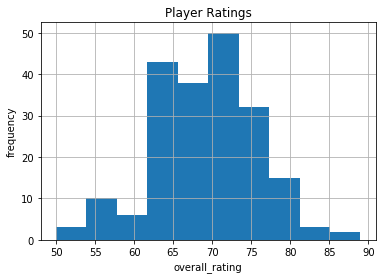

In [12]:
#plot distribution of overall_rating of these 202 players
HA = df_A_09['overall_rating'].hist();
HA.set_title('Player Ratings');
HA.set_xlabel('overall_rating');
HA.set_ylabel('frequency');

Players Q2 answer

From the graph, it can be seen that the overall rating of players in 2009 after June follows a normal distribution with a majority of players having an overall rating between approximately 69 and 73.

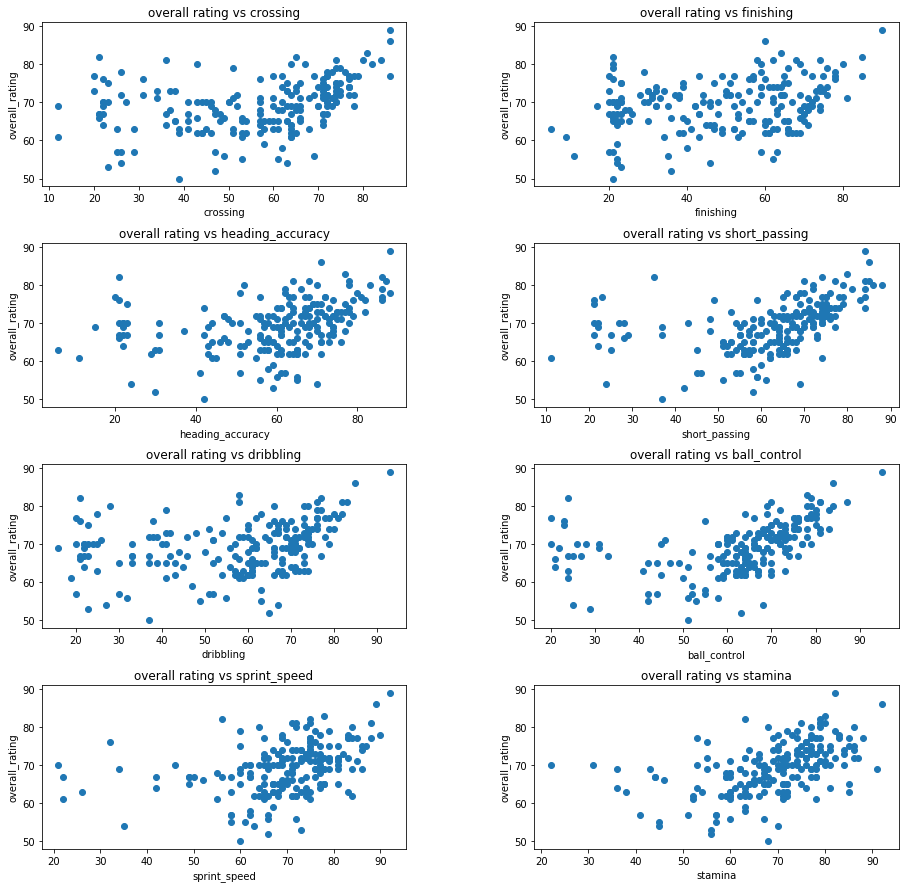

In [13]:
#plot graphs of overall rating vs selected attributes
fig, ax = plt.subplots(4, 2, figsize=(14, 14));
ax[0, 0].scatter(df_A_09['crossing'], df_A_09['overall_rating'])
ax[0, 0].set_xlabel('crossing')
ax[0, 0].set_ylabel('overall_rating')
ax[0, 0].set_title('overall rating vs crossing')
ax[0, 1].scatter(df_A_09['finishing'], df_A_09['overall_rating'])
ax[0, 1].set_xlabel('finishing')
ax[0, 1].set_ylabel('overall_rating')
ax[0, 1].set_title('overall rating vs finishing')
ax[1, 0].scatter(df_A_09['heading_accuracy'], df_A_09['overall_rating'])
ax[1, 0].set_xlabel('heading_accuracy')
ax[1, 0].set_ylabel('overall_rating')
ax[1, 0].set_title('overall rating vs heading_accuracy')
ax[1, 1].scatter(df_A_09['short_passing'], df_A_09['overall_rating'])
ax[1, 1].set_xlabel('short_passing')
ax[1, 1].set_ylabel('overall_rating')
ax[1, 1].set_title('overall rating vs short_passing')
ax[2, 0].scatter(df_A_09['dribbling'], df_A_09['overall_rating'])
ax[2, 0].set_xlabel('dribbling')
ax[2, 0].set_ylabel('overall_rating')
ax[2, 0].set_title('overall rating vs dribbling')
ax[2, 1].scatter(df_A_09['ball_control'], df_A_09['overall_rating'])
ax[2, 1].set_xlabel('ball_control')
ax[2, 1].set_ylabel('overall_rating')
ax[2, 1].set_title('overall rating vs ball_control')
ax[3, 0].scatter(df_A_09['sprint_speed'], df_A_09['overall_rating'])
ax[3, 0].set_xlabel('sprint_speed')
ax[3, 0].set_ylabel('overall_rating')
ax[3, 0].set_title('overall rating vs sprint_speed')
ax[3, 1].scatter(df_A_09['stamina'], df_A_09['overall_rating'])
ax[3, 1].set_xlabel('stamina')
ax[3, 1].set_ylabel('overall_rating')
ax[3, 1].set_title('overall rating vs stamina')
plt.subplots_adjust(top=0.92, bottom=0.1, left=0.10, right=0.95, hspace=0.35, wspace=0.35)

plt.show()



Players Q3 answer

The graphs show a possitive correlation between the stated attributes against player overall_rating. A lot of players with a high rating in stamina, sprint_speed, dribbling, ball_control, heading_accuracy and short_passing have a high over_all rating where as players rating in crossing and finishing is more evenly spread out compared to the other attributes suggesting it does not have a big weight in determining overall rating i.e. many players with low rating in crossing and finishing have high overall rating as much as many players with high rating in crossing and finishing also have high overall rating. 

NOTE: These are not the only attributes that contribute to the overall rating

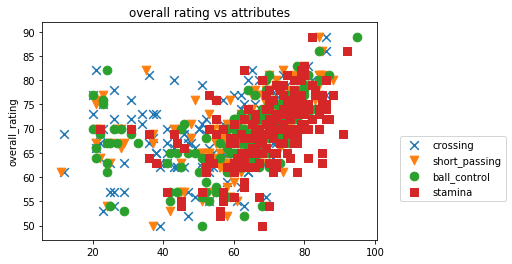

In [14]:
df_illustration = df_A_09
plt.scatter(df_illustration['crossing'], df_illustration['overall_rating'], s=75, marker='x', label='crossing');
plt.scatter(df_illustration['short_passing'], df_illustration['overall_rating'], s=75, marker='v', label='short_passing');
plt.scatter(df_illustration['ball_control'], df_illustration['overall_rating'], s=75, marker='o', label='ball_control');
plt.scatter(df_illustration['stamina'], df_illustration['overall_rating'], s=75, marker='s', label='stamina');
plt.legend(loc=0, bbox_to_anchor=(0.9, 0., 0.5, 0.5));
plt.title('overall rating vs attributes');
plt.ylabel('overall_rating');

The figure above illustrates the point made in Q3 more closely i.e. crossing rating being more spread out.

### More Data cleaning

The dataframe is narrowed to columns of interest and duplicates are removed.

In [15]:
#Look at team data
df_t.head()

,match_api_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_long_name,id,team_fifa_api_id,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,489042,2008/2009,10260,10261,1,1,10260,Manchester United,807,11,...,65,Normal,Free Form,40,Medium,50,Press,40,Normal,Cover
1,489042,2008/2009,10260,10261,1,1,10260,Manchester United,808,11,...,70,Lots,Free Form,45,Medium,45,Press,65,Normal,Cover
2,489042,2008/2009,10260,10261,1,1,10260,Manchester United,809,11,...,55,Normal,Organised,40,Medium,50,Press,56,Normal,Cover
3,489042,2008/2009,10260,10261,1,1,10260,Manchester United,810,11,...,37,Normal,Organised,49,Medium,49,Press,56,Normal,Cover
4,489042,2008/2009,10260,10261,1,1,10260,Manchester United,811,11,...,56,Normal,Organised,42,Medium,41,Press,56,Normal,Cover


In [16]:
#Look at data from the 2009/2010 season
df_t09_10 = df_t.query('season == "2009/2010"')
df_t09_10

,match_api_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_long_name,id,team_fifa_api_id,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
2280,658571,2009/2010,10260,8658,1,0,10260,Manchester United,807,11,...,65,Normal,Free Form,40,Medium,50,Press,40,Normal,Cover
2281,658571,2009/2010,10260,8658,1,0,10260,Manchester United,808,11,...,70,Lots,Free Form,45,Medium,45,Press,65,Normal,Cover
2282,658571,2009/2010,10260,8658,1,0,10260,Manchester United,809,11,...,55,Normal,Organised,40,Medium,50,Press,56,Normal,Cover
2283,658571,2009/2010,10260,8658,1,0,10260,Manchester United,810,11,...,37,Normal,Organised,49,Medium,49,Press,56,Normal,Cover
2284,658571,2009/2010,10260,8658,1,0,10260,Manchester United,811,11,...,56,Normal,Organised,42,Medium,41,Press,56,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,658698,2009/2010,9825,8658,3,1,9825,Arsenal,72,1,...,65,Normal,Free Form,50,Medium,40,Press,45,Normal,Cover
4556,658698,2009/2010,9825,8658,3,1,9825,Arsenal,73,1,...,30,Little,Free Form,57,Medium,57,Press,52,Normal,Cover
4557,658698,2009/2010,9825,8658,3,1,9825,Arsenal,74,1,...,39,Normal,Free Form,64,Medium,54,Press,52,Normal,Cover
4558,658698,2009/2010,9825,8658,3,1,9825,Arsenal,75,1,...,64,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover


In [17]:
#select columns interested in
df_t09_10 = df_t09_10.iloc[:, :8]
df_t09_10


,match_api_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_long_name
2280,658571,2009/2010,10260,8658,1,0,10260,Manchester United
2281,658571,2009/2010,10260,8658,1,0,10260,Manchester United
2282,658571,2009/2010,10260,8658,1,0,10260,Manchester United
2283,658571,2009/2010,10260,8658,1,0,10260,Manchester United
2284,658571,2009/2010,10260,8658,1,0,10260,Manchester United
...,...,...,...,...,...,...,...,...
4555,658698,2009/2010,9825,8658,3,1,9825,Arsenal
4556,658698,2009/2010,9825,8658,3,1,9825,Arsenal
4557,658698,2009/2010,9825,8658,3,1,9825,Arsenal
4558,658698,2009/2010,9825,8658,3,1,9825,Arsenal


In [18]:
#Check missing data and datatypes
df_t09_10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2280 entries, 2280 to 4559
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_api_id      2280 non-null   int64 
 1   season            2280 non-null   object
 2   home_team_api_id  2280 non-null   int64 
 3   away_team_api_id  2280 non-null   int64 
 4   home_team_goal    2280 non-null   int64 
 5   away_team_goal    2280 non-null   int64 
 6   team_api_id       2280 non-null   int64 
 7   team_long_name    2280 non-null   object
dtypes: int64(6), object(2)
memory usage: 160.3+ KB


In [19]:
#narrow data frame to 380 entries which is number of matches in 2009/2010 season
df_t09_10.drop_duplicates(subset='match_api_id', keep = 'first', inplace = True)
df_t09_10

,match_api_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_long_name
2280,658571,2009/2010,10260,8658,1,0,10260,Manchester United
2286,658574,2009/2010,8586,8650,2,1,8586,Tottenham Hotspur
2292,658575,2009/2010,10252,8528,0,2,10252,Aston Villa
2298,658576,2009/2010,8668,9825,1,6,8668,Everton
2304,658577,2009/2010,8602,8654,0,2,8602,Wolverhampton Wanderers
...,...,...,...,...,...,...,...,...
4530,658694,2009/2010,10252,8455,2,1,10252,Aston Villa
4536,658695,2009/2010,8472,8650,1,0,8472,Sunderland
4542,658696,2009/2010,8528,8456,1,1,8528,Wigan Athletic
4548,658697,2009/2010,8462,8586,1,2,8462,Portsmouth


### More exploring

A result column is added to the team data to show the home team result for all matches played and a graph is plotted to show how many draws each team had. Also, a log table is shown to show which team won the league.

In [20]:
#add result column which shows the home team outcome of the match and set index from 0 to 379
def result (row):
    if row['home_team_goal'] > row['away_team_goal']:
        return 'W'
    elif row['home_team_goal'] < row['away_team_goal']:
        return 'L'
    else:
        return 'D'
df_t09_10['result'] = df_t09_10.apply(lambda row: result(row), axis = 1)
df_t09_10.index = np.arange(0, len(df_t09_10.index))
df_t09_10

,match_api_id,season,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,team_api_id,team_long_name,result
0,658571,2009/2010,10260,8658,1,0,10260,Manchester United,W
1,658574,2009/2010,8586,8650,2,1,8586,Tottenham Hotspur,W
2,658575,2009/2010,10252,8528,0,2,10252,Aston Villa,L
3,658576,2009/2010,8668,9825,1,6,8668,Everton,L
4,658577,2009/2010,8602,8654,0,2,8602,Wolverhampton Wanderers,L
...,...,...,...,...,...,...,...,...,...
375,658694,2009/2010,10252,8455,2,1,10252,Aston Villa,W
376,658695,2009/2010,8472,8650,1,0,8472,Sunderland,W
377,658696,2009/2010,8528,8456,1,1,8528,Wigan Athletic,D
378,658697,2009/2010,8462,8586,1,2,8462,Portsmouth,L


In [21]:
#create dataframe of selected columns i.e. team name and result
df_smatches = df_t09_10.iloc[:, [7, 8]]
df_smatches

,team_long_name,result
0,Manchester United,W
1,Tottenham Hotspur,W
2,Aston Villa,L
3,Everton,L
4,Wolverhampton Wanderers,L
...,...,...
375,Aston Villa,W
376,Sunderland,W
377,Wigan Athletic,D
378,Portsmouth,L


Teams Q1 answer

The results of all 380 matches are shown in the result column

In [22]:
#create dataframe of log i.e. team names and points
df_l = df_t09_10.iloc[:, [1, 7]]
df_l.drop_duplicates(subset = 'team_long_name', keep = 'first', inplace = True)
df_l

C:\Users\BelServest\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,season,team_long_name
0,2009/2010,Manchester United
1,2009/2010,Tottenham Hotspur
2,2009/2010,Aston Villa
3,2009/2010,Everton
4,2009/2010,Wolverhampton Wanderers
5,2009/2010,Blackburn Rovers
6,2009/2010,Bolton Wanderers
7,2009/2010,Portsmouth
8,2009/2010,Stoke City
9,2009/2010,Chelsea


In [23]:
#create array of zeros the size of above dataframe index
arr = np.zeros(df_l.shape[0], dtype=int)
arr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
#create column 'points' with input of created array
df_l['points'] = arr
df_l

C:\Users\BelServest\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,season,team_long_name,points
0,2009/2010,Manchester United,0
1,2009/2010,Tottenham Hotspur,0
2,2009/2010,Aston Villa,0
3,2009/2010,Everton,0
4,2009/2010,Wolverhampton Wanderers,0
5,2009/2010,Blackburn Rovers,0
6,2009/2010,Bolton Wanderers,0
7,2009/2010,Portsmouth,0
8,2009/2010,Stoke City,0
9,2009/2010,Chelsea,0


In [25]:
#order index from 0 to 19
df_l.index = np.arange(0, len(df_l.index))
df_l = df_l
df_l


,season,team_long_name,points
0,2009/2010,Manchester United,0
1,2009/2010,Tottenham Hotspur,0
2,2009/2010,Aston Villa,0
3,2009/2010,Everton,0
4,2009/2010,Wolverhampton Wanderers,0
5,2009/2010,Blackburn Rovers,0
6,2009/2010,Bolton Wanderers,0
7,2009/2010,Portsmouth,0
8,2009/2010,Stoke City,0
9,2009/2010,Chelsea,0


In [26]:
#merge tables df_l(log) and df_smatches(season matches) to creat main_df
main_df = pd.merge(df_l, df_smatches, on='team_long_name', how='inner')
main_df

,season,team_long_name,points,result
0,2009/2010,Manchester United,0,W
1,2009/2010,Manchester United,0,W
2,2009/2010,Manchester United,0,W
3,2009/2010,Manchester United,0,L
4,2009/2010,Manchester United,0,W
...,...,...,...,...
375,2009/2010,Wigan Athletic,0,W
376,2009/2010,Wigan Athletic,0,D
377,2009/2010,Wigan Athletic,0,W
378,2009/2010,Wigan Athletic,0,W


In [27]:
#Get the number of wins 'W', draws 'D' and losses 'L' for each team
dfm = df_smatches.groupby(['team_long_name', 'result']).size()
dfm

team_long_name           result
Arsenal                  D          2
                         L          2
                         W         15
Aston Villa              D          8
                         L          3
                         W          8
Birmingham City          D          9
                         L          2
                         W          8
Blackburn Rovers         D          6
                         L          3
                         W         10
Bolton Wanderers         D          6
                         L          7
                         W          6
Burnley                  D          5
                         L          7
                         W          7
Chelsea                  D          1
                         L          1
                         W         17
Everton                  D          6
                         L          2
                         W         11
Fulham                   D          3
                  

In [28]:
#add column name 'counts'
dfm = dfm.reset_index(name = 'counts')
dfm

,team_long_name,result,counts
0,Arsenal,D,2
1,Arsenal,L,2
2,Arsenal,W,15
3,Aston Villa,D,8
4,Aston Villa,L,3
5,Aston Villa,W,8
6,Birmingham City,D,9
7,Birmingham City,L,2
8,Birmingham City,W,8
9,Blackburn Rovers,D,6


In [29]:
#Get number of draws 'D' for each team
df_draws = dfm.query('result == "D"')
df_draws

,team_long_name,result,counts
0,Arsenal,D,2
3,Aston Villa,D,8
6,Birmingham City,D,9
9,Blackburn Rovers,D,6
12,Bolton Wanderers,D,6
15,Burnley,D,5
18,Chelsea,D,1
21,Everton,D,6
24,Fulham,D,3
27,Hull City,D,6


In [30]:
#set team long name to be the index
df_draws = df_draws.set_index(['team_long_name'])

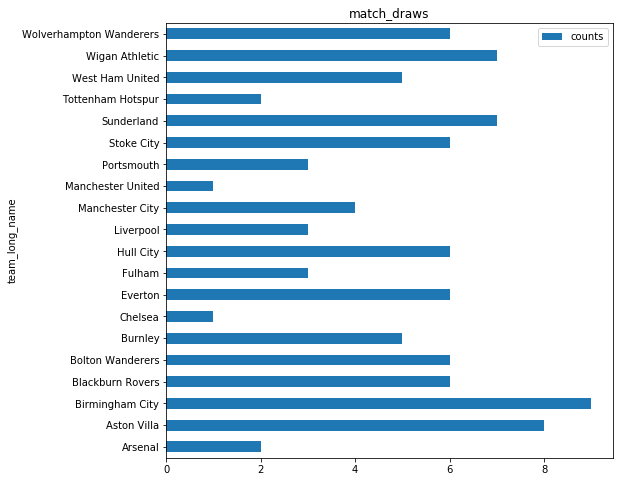

In [31]:
#plot horizontal bar graph showing home draws 'D' for each Team
df_draws.plot(kind = 'barh', title = 'match_draws', figsize = (8, 8));

Teams Q2 answer above

The graph shows that Birmingham City had the most draws in the 2009/2010 season

In [32]:
#create function for calculating points of teams i.e. 3 for 'W', 1 for 'D' and 0 for 'L'
def scoring(result):
        if result == 'W':
            return 3
        elif result == 'D':
            return 1
        else:
            return 0
main_df['points'] = main_df['result'].apply(scoring)

In [33]:
main_df = main_df.groupby('team_long_name').sum()
main_df

,points
team_long_name,
Arsenal,47
Aston Villa,32
Birmingham City,33
Blackburn Rovers,36
Bolton Wanderers,24
Burnley,26
Chelsea,52
Everton,39
Fulham,36


In [34]:
#order dataframe in descending order of points to see which team won the 2009/2010 EPL
main_df = main_df['points'].sort_values(ascending = False)

In [35]:
main_df

team_long_name
Chelsea                    52
Manchester United          49
Arsenal                    47
Tottenham Hotspur          44
Liverpool                  42
Manchester City            40
Everton                    39
Blackburn Rovers           36
Fulham                     36
Sunderland                 34
Birmingham City            33
Aston Villa                32
Stoke City                 27
West Ham United            26
Burnley                    26
Wigan Athletic             25
Hull City                  24
Bolton Wanderers           24
Wolverhampton Wanderers    21
Portsmouth                 18
Name: points, dtype: int64

Teams Q3 Answer above

The log shows that Chelsea won the league

## Conclusion

The player data shows that there is a positive correlation between the player attributes and overall player rating. Some attributes have less weight than others in terms of their contribution to overall rating which the scatter plots show. It is however important to note that not all attributes were plotted against the overall player rating. The team data shows the outcome of matches and which team won the league.